In [1]:
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt

# load data

In [2]:
folder_path = "C:/Users/heung/OneDrive/Documents/scData/14. GSE136001_RAW/"
adata = sc.read(folder_path + "preprocessed_adata.h5ad")

# batch 확인

In [4]:
sc.pp.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)

In [5]:
adata.obs['sample'].unique()

['f-ctrl-1', 'f-ctrl-2', 'f-tumor-1', 'f-tumor-2', 'm-ctrl-1', 'm-ctrl-2', 'm-tumor-1', 'm-tumor-2']
Categories (8, object): ['f-ctrl-1', 'f-ctrl-2', 'f-tumor-1', 'f-tumor-2', 'm-ctrl-1', 'm-ctrl-2', 'm-tumor-1', 'm-tumor-2']

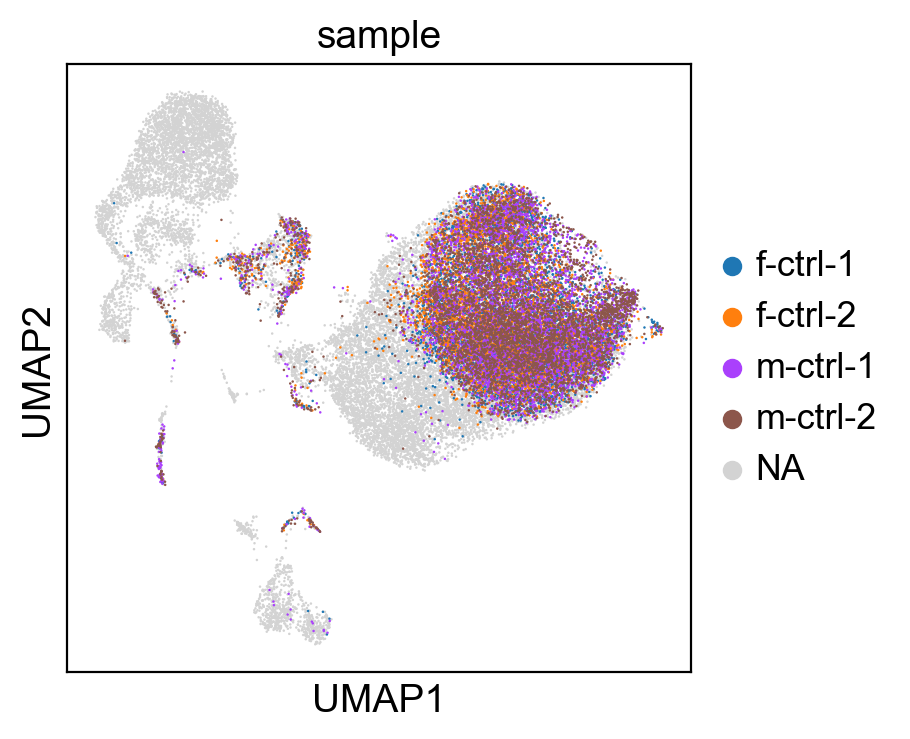

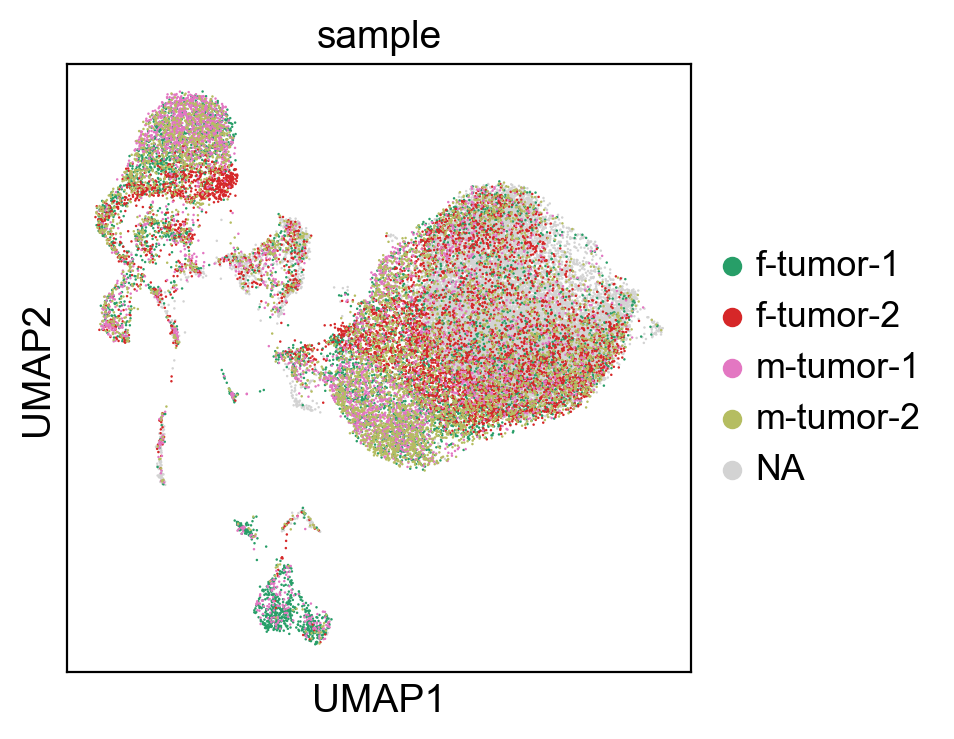

In [6]:
sc.settings.set_figure_params(dpi=100, figsize = (4, 4))
sc.pl.umap(
    adata,
    color = 'sample',
    groups = ['f-ctrl-1', 'f-ctrl-2', 'm-ctrl-1', 'm-ctrl-2',],
)
sc.pl.umap(
    adata,
    color = 'sample',
    groups = ['f-tumor-1', 'f-tumor-2', 'm-tumor-1', 'm-tumor-2',],
)

# batch correctino by BBKNN

In [7]:
sc.external.pp.bbknn(adata, batch_key = 'sample')
sc.pp.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)

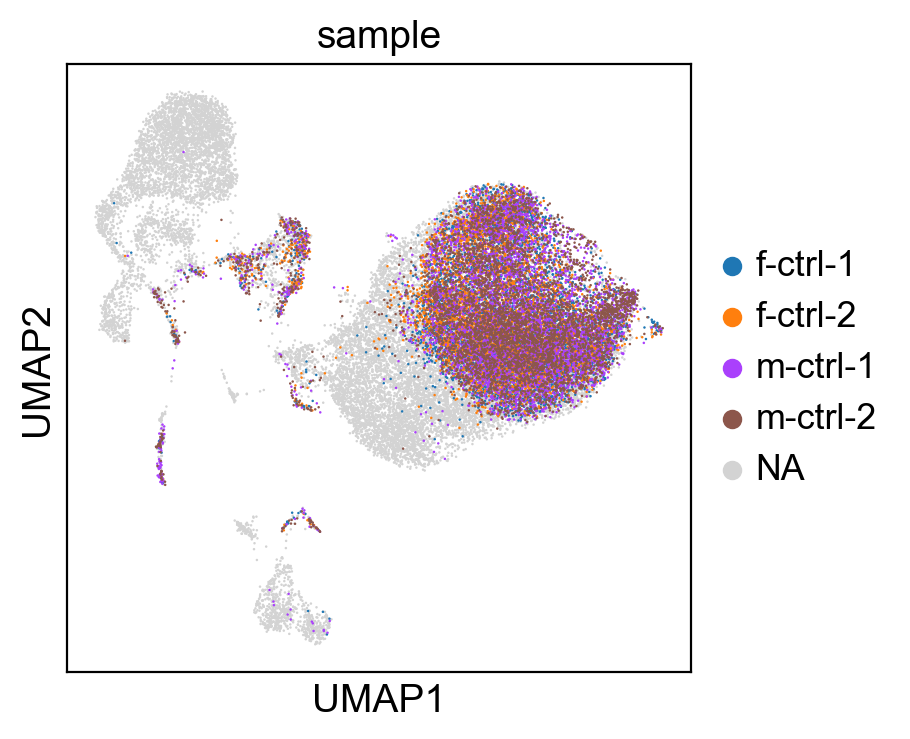

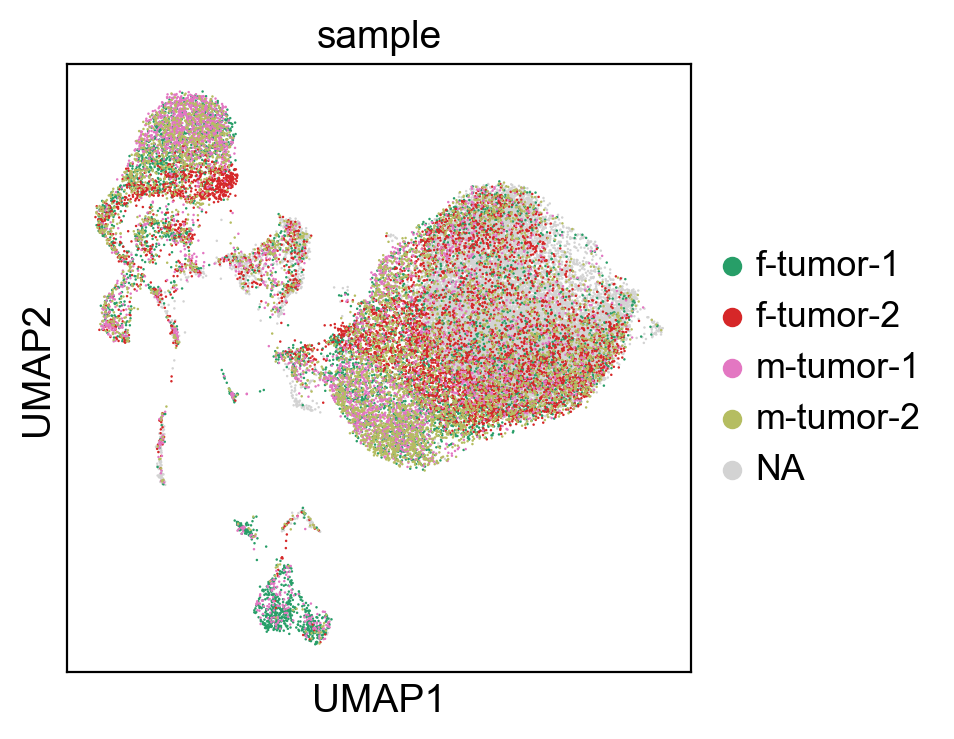

In [8]:
sc.settings.set_figure_params(dpi=100, figsize = (4, 4))
sc.pl.umap(
    adata,
    color = 'sample',
    groups = ['f-ctrl-1', 'f-ctrl-2', 'm-ctrl-1', 'm-ctrl-2',],
)
sc.pl.umap(
    adata,
    color = 'sample',
    groups = ['f-tumor-1', 'f-tumor-2', 'm-tumor-1', 'm-tumor-2',],
)

> 된건지 잘 모르겠음.\
> 아예 차이가 없는 듯\
> 원본 논문에서도 normal에서는 microglia가 대부분이었는데 tumor 에서 macrophage, T cell 등 다양한 세포가 생긴다고 나와서 그렇게 틀린거 같진 않기도 하고?

# Save

In [9]:
adata.write_h5ad(folder_path + "adata_BBKNN.h5ad")